<a href="https://colab.research.google.com/github/piyush5432/Capstone-Python/blob/main/Capstone_Project_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install explainerdashboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.2 MB/s eta 0:00:00


In [4]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=7f425e4d6788225d7968a6e01180046851b404278ad1b2b4000c4fe70bd9b64d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from lime import lime_tabular
import shap

# Read data
data = pd.read_csv("data.csv")

# Preprocessing
data['Sepsis_Result'] = data['Sepsis_Result'].astype('category')
data['Gender'] = data['Gender'].astype('category')

# Split data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=123)


In [6]:
databackup=data

In [7]:
data.head()

,Gender,Age,ICULOS,HospAdmTime,HR,O2Sat,SBP,MAP,DBP,Sepsis_Result
0,1,59.28,53,-0.02,87.0,100.0,105.0,65.0,67.0,1
1,1,59.28,54,-0.02,93.0,100.0,94.0,72.0,56.0,1
2,1,59.28,55,-0.02,95.0,100.0,110.0,80.0,90.0,1
3,1,59.28,56,-0.02,94.0,100.0,95.0,74.0,58.0,1
4,1,59.28,57,-0.02,94.0,100.0,95.0,73.0,58.0,1


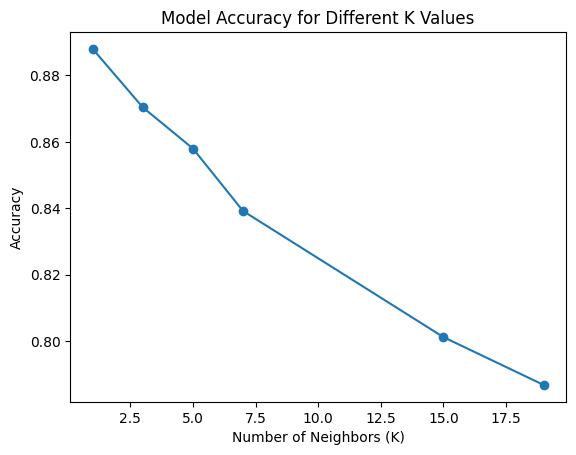

In [8]:
# KNN
k_values = [1, 3, 5, 7, 15, 19]
accuracy_values = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(train_data.iloc[:, :-1], train_data['Sepsis_Result'])
    predictions = knn_model.predict(test_data.iloc[:, :-1])
    accuracy_values.append(accuracy_score(test_data['Sepsis_Result'], predictions))

# Plotting accuracy vs. k
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title('Model Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.show()


In [9]:
# SVM
svm_model = svm.SVC()
svm_model.fit(train_data.iloc[:, :-1], train_data['Sepsis_Result'])
svm_predictions = svm_model.predict(test_data.iloc[:, :-1])


In [10]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(train_data.iloc[:, :-1], train_data['Sepsis_Result'])
dt_predictions = dt_model.predict(test_data.iloc[:, :-1])


In [12]:
# Convert categorical variables to one-hot encoding
train_data_encoded = pd.get_dummies(train_data.iloc[:, :-1])
test_data_encoded = pd.get_dummies(test_data.iloc[:, :-1])

# Train XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.1, n_estimators=100)
xgb_model.fit(train_data_encoded, train_data['Sepsis_Result'])
xgb_predictions = xgb_model.predict(test_data_encoded)


In [13]:
# Convert categorical target variable to numerical format
train_labels = (train_data['Sepsis_Result'] == 'Positive').astype(int)
test_labels = (test_data['Sepsis_Result'] == 'Positive').astype(int)

# Train LightGBM model
lgb_train = lgb.Dataset(data=train_data_encoded, label=train_labels)
params = {'objective': 'binary', 'metric': 'binary_error', 'num_leaves': 10, 'learning_rate': 0.1, 'num_iterations': 100}
lgb_model = lgb.train(params, lgb_train)
lgb_predictions = (lgb_model.predict(test_data_encoded) > 0.5).astype(int)


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 7500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.098998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1467
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because the

In [14]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_model.fit(train_data.iloc[:, :-1], train_data['Sepsis_Result'])
rf_predictions = rf_model.predict(test_data.iloc[:, :-1])


In [15]:
# Ensemble methods
models = [knn_model, svm_model, dt_model, lgb_model, xgb_model, rf_model]


In [16]:
# Bagging
bagging_model = BaggingClassifier(base_estimator=None, n_estimators=10, random_state=123)
bagging_model.fit(train_data.iloc[:, :-1], train_data['Sepsis_Result'])
bagging_predictions = bagging_model.predict(test_data.iloc[:, :-1])


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Specify base estimator (e.g., Decision Tree)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create AdaBoostClassifier with the specified base estimator
boosting_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=123)

# Train AdaBoostClassifier
boosting_model.fit(train_data.iloc[:, :-1], train_data['Sepsis_Result'])

# Make predictions
boosting_predictions = boosting_model.predict(test_data.iloc[:, :-1])


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [18]:
# Interpretability - Lime
explainer = lime_tabular.LimeTabularExplainer(train_data.iloc[:, :-1].values,
                                              feature_names=train_data.columns[:-1],
                                              class_names=['Negative', 'Positive'])

lime_explanation = explainer.explain_instance(test_data.iloc[0, :-1].values, rf_model.predict_proba)
lime_explanation.show_in_notebook()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


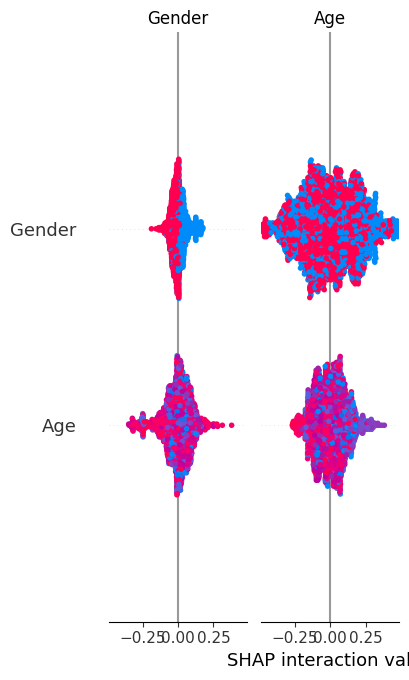

In [19]:
# Interpretability - SHAP
shap_explainer = shap.TreeExplainer(rf_model)
shap_values = shap_explainer.shap_values(test_data.iloc[:, :-1])
shap.summary_plot(shap_values, test_data.iloc[:, :-1])


In [20]:
# Read data
data = pd.read_csv("data.csv")

# Preprocessing
data['Sepsis_Result'] = data['Sepsis_Result'].astype('category')
data['Gender'] = data['Gender'].astype('category')

# Split data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=123)

# Verify if 'Sepsis_Result' is present in both train_data and test_data
print('Sepsis_Result in train_data:', 'Sepsis_Result' in train_data.columns)
print('Sepsis_Result in test_data:', 'Sepsis_Result' in test_data.columns)


Sepsis_Result in train_data: True
Sepsis_Result in test_data: True


In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from lime import lime_tabular
import shap
import time

# Read data
data = pd.read_csv("data.csv")

# Preprocessing
data['Sepsis_Result'] = data['Sepsis_Result'].astype('category')
data['Gender'] = data['Gender'].astype('category')

# Split data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=123)

# Convert categorical variables to one-hot encoding
train_data_encoded = pd.get_dummies(train_data.iloc[:, :-1])
test_data_encoded = pd.get_dummies(test_data.iloc[:, :-1])

# Calculate accuracy and training time for each model
train_acc = []
test_acc = []
training_time = []

# Single models
single_models = ['KNN', 'SVM', 'Decision Tree', 'LightGBM', 'XGBoost', 'Random Forest']
for model_name in single_models:
    model = None
    if model_name == 'KNN':
        model = KNeighborsClassifier(n_neighbors=5)
    elif model_name == 'SVM':
        model = svm.SVC()
    elif model_name == 'Decision Tree':
        model = DecisionTreeClassifier()
    elif model_name == 'LightGBM':
        model = lgb.LGBMClassifier(objective='binary')
    elif model_name == 'XGBoost':
        model = xgb.XGBClassifier(objective='binary:logistic')
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100, random_state=123)

    model.fit(train_data_encoded, train_data['Sepsis_Result'])
    train_accuracy = model.score(train_data_encoded, train_data['Sepsis_Result'])
    test_accuracy = model.score(test_data_encoded, test_data['Sepsis_Result'])
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

    # Calculate training time
    start_time = time.time()
    model.fit(train_data_encoded, train_data['Sepsis_Result'])
    end_time = time.time()
    training_time.append(end_time - start_time)

# Ensemble models
ensemble_models = ['Bagging', 'AdaBoost']
for model_name in ensemble_models:
    model = None
    if model_name == 'Bagging':
        model = BaggingClassifier(base_estimator=None, n_estimators=10, random_state=123)
    elif model_name == 'AdaBoost':
        base_estimator = DecisionTreeClassifier(max_depth=1)
        model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=123)

    model.fit(train_data_encoded, train_data['Sepsis_Result'])
    train_accuracy = model.score(train_data_encoded, train_data['Sepsis_Result'])
    test_accuracy = model.score(test_data_encoded, test_data['Sepsis_Result'])
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

    # Calculate training time
    start_time = time.time()
    model.fit(train_data_encoded, train_data['Sepsis_Result'])
    end_time = time.time()
    training_time.append(end_time - start_time)

# Create DataFrame
Conclusion = pd.DataFrame({
    'Models': single_models + ensemble_models,
    'train acc': train_acc,
    'test acc': test_acc,
    'training time': training_time
})

# Display DataFrame
print(Conclusion)


[LightGBM] [Info] Number of positive: 3758, number of negative: 3742
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1467
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501067 -> initscore=0.004267
[LightGBM] [Info] Start training from score 0.004267
[LightGBM] [Info] Number of positive: 3758, number of negative: 3742
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1467
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501067 -> initscore=0.004267
[LightGBM] 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


          Models  train acc  test acc  training time
0            KNN   0.914000    0.8588       0.017349
1            SVM   0.684133    0.6992       2.619283
2  Decision Tree   1.000000    0.9664       0.037593
3       LightGBM   0.994133    0.9824       0.157023
4        XGBoost   0.999467    0.9868       0.217237
5  Random Forest   1.000000    0.9672       2.124279
6        Bagging   0.998533    0.9680       0.636529
7       AdaBoost   0.762133    0.7664       0.520027


In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from lime import lime_tabular
import shap
import time

# Read data
data = pd.read_csv("data.csv")

# Preprocessing
data['Sepsis_Result'] = data['Sepsis_Result'].astype('category')
data['Gender'] = data['Gender'].astype('category')

# Split data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=123)

# Convert categorical variables to one-hot encoding
train_data_encoded = pd.get_dummies(train_data.iloc[:, :-1])
test_data_encoded = pd.get_dummies(test_data.iloc[:, :-1])

# Calculate accuracy and training time for each model
train_acc = []
test_acc = []
training_time = []

# Single models
single_models = ['KNN', 'SVM', 'Decision Tree', 'LightGBM', 'XGBoost', 'Random Forest']
for model_name in single_models:
    model = None
    if model_name == 'KNN':
        model = KNeighborsClassifier(n_neighbors=5)
    elif model_name == 'SVM':
        model = svm.SVC()
    elif model_name == 'Decision Tree':
        model = DecisionTreeClassifier()
    elif model_name == 'LightGBM':
        model = lgb.LGBMClassifier(objective='binary')
    elif model_name == 'XGBoost':
        model = xgb.XGBClassifier(objective='binary:logistic')
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100, random_state=123)

    model.fit(train_data_encoded, train_data['Sepsis_Result'])
    train_accuracy = model.score(train_data_encoded, train_data['Sepsis_Result'])
    test_accuracy = model.score(test_data_encoded, test_data['Sepsis_Result'])
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

    # Calculate training time
    start_time = time.time()
    model.fit(train_data_encoded, train_data['Sepsis_Result'])
    end_time = time.time()
    training_time.append(end_time - start_time)

# Ensemble models
ensemble_models = ['Bagging', 'AdaBoost']
for model_name in ensemble_models:
    model = None
    if model_name == 'Bagging':
        model = BaggingClassifier(base_estimator=None, n_estimators=10, random_state=123)
    elif model_name == 'AdaBoost':
        model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=123)

    model.fit(train_data_encoded, train_data['Sepsis_Result'])
    train_accuracy = model.score(train_data_encoded, train_data['Sepsis_Result'])
    test_accuracy = model.score(test_data_encoded, test_data['Sepsis_Result'])
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

    # Calculate training time
    start_time = time.time()
    model.fit(train_data_encoded, train_data['Sepsis_Result'])
    end_time = time.time()
    training_time.append(end_time - start_time)

# Create DataFrame
Conclusion = pd.DataFrame({
    'Models': single_models + ensemble_models,
    'train acc': train_acc,
    'test acc': test_acc,
    'training time': training_time
})

# Display DataFrame
print(Conclusion)


[LightGBM] [Info] Number of positive: 3758, number of negative: 3742
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1467
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501067 -> initscore=0.004267
[LightGBM] [Info] Start training from score 0.004267
[LightGBM] [Info] Number of positive: 3758, number of negative: 3742
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1467
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501067 -> initscore=0.004267
[LightGBM] 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


          Models  train acc  test acc  training time
0            KNN   0.914000    0.8588       0.013044
1            SVM   0.684133    0.6992       2.621508
2  Decision Tree   1.000000    0.9668       0.034406
3       LightGBM   0.994133    0.9824       0.171599
4        XGBoost   0.999467    0.9868       0.399016
5  Random Forest   1.000000    0.9672       2.119562
6        Bagging   0.998533    0.9680       0.454798
7       AdaBoost   0.762133    0.7664       0.742677


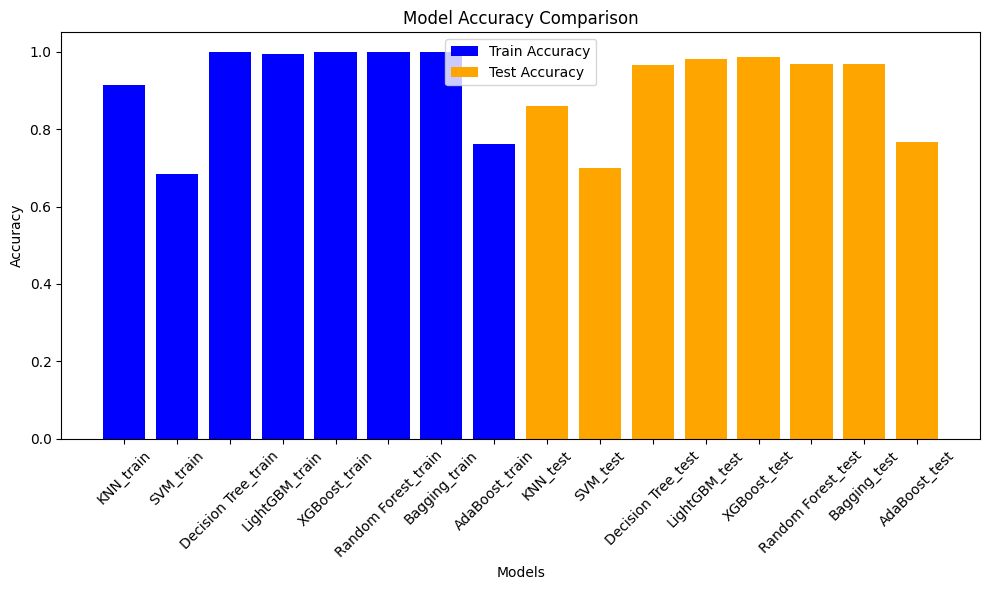

In [25]:
# Plotting accuracy scores
plt.figure(figsize=(10, 6))

# Plot train accuracy
plt.bar(Conclusion['Models'] + "_train", Conclusion['train acc'], color='blue', label='Train Accuracy')

# Plot test accuracy
plt.bar(Conclusion['Models'] + "_test", Conclusion['test acc'], color='orange', label='Test Accuracy')

plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


[LightGBM] [Info] Number of positive: 3758, number of negative: 3742
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1467
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501067 -> initscore=0.004267
[LightGBM] [Info] Start training from score 0.004267


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


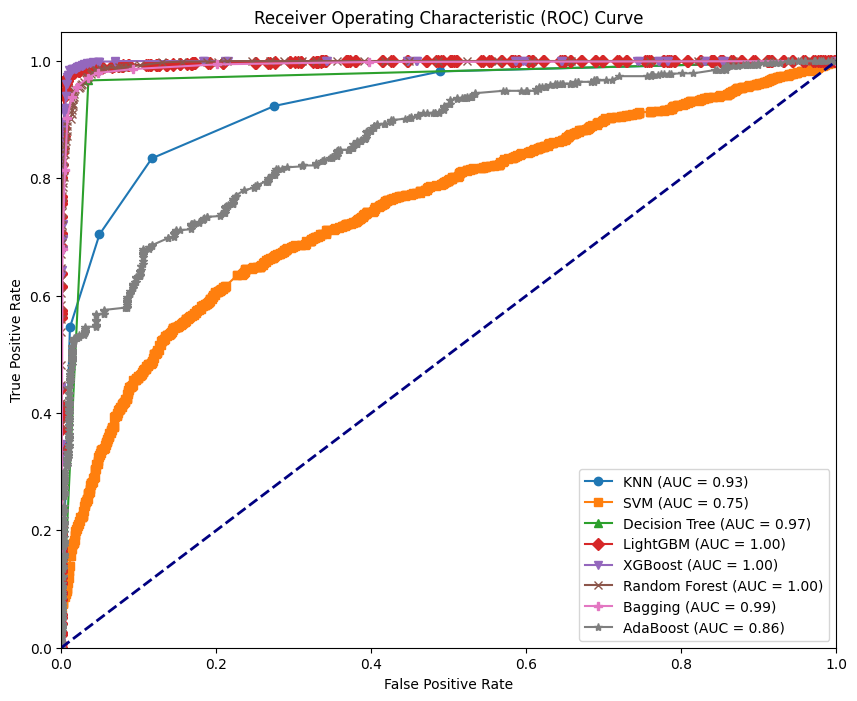

In [35]:
# Calculate ROC curve for each model
plt.figure(figsize=(10, 8))
markers = ['o', 's', '^', 'D', 'v', 'x', 'P', '*', 'h', '+']  # List of markers for each model
for i, model_name in enumerate(single_models + ensemble_models):
    model = None
    if model_name in single_models:
        if model_name == 'KNN':
            model = KNeighborsClassifier(n_neighbors=5)
        elif model_name == 'SVM':
            model = svm.SVC(probability=True)  # Set probability=True for SVC to enable predict_proba
        elif model_name == 'Decision Tree':
            model = DecisionTreeClassifier()
        elif model_name == 'LightGBM':
            model = lgb.LGBMClassifier(objective='binary')
        elif model_name == 'XGBoost':
            model = xgb.XGBClassifier(objective='binary:logistic')
        elif model_name == 'Random Forest':
            model = RandomForestClassifier(n_estimators=100, random_state=123)
    elif model_name in ensemble_models:
        if model_name == 'Bagging':
            model = BaggingClassifier(base_estimator=None, n_estimators=10, random_state=123)
        elif model_name == 'AdaBoost':
            base_estimator = DecisionTreeClassifier(max_depth=1)
            model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=123)

    model.fit(train_data_encoded, train_data['Sepsis_Result'])  # Fit the model
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(test_data_encoded)[:, 1]
        fpr, tpr, _ = roc_curve(test_data['Sepsis_Result'], proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, marker=markers[i], label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Info] Number of positive: 3758, number of negative: 3742
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1467
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501067 -> initscore=0.004267
[LightGBM] [Info] Start training from score 0.004267


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


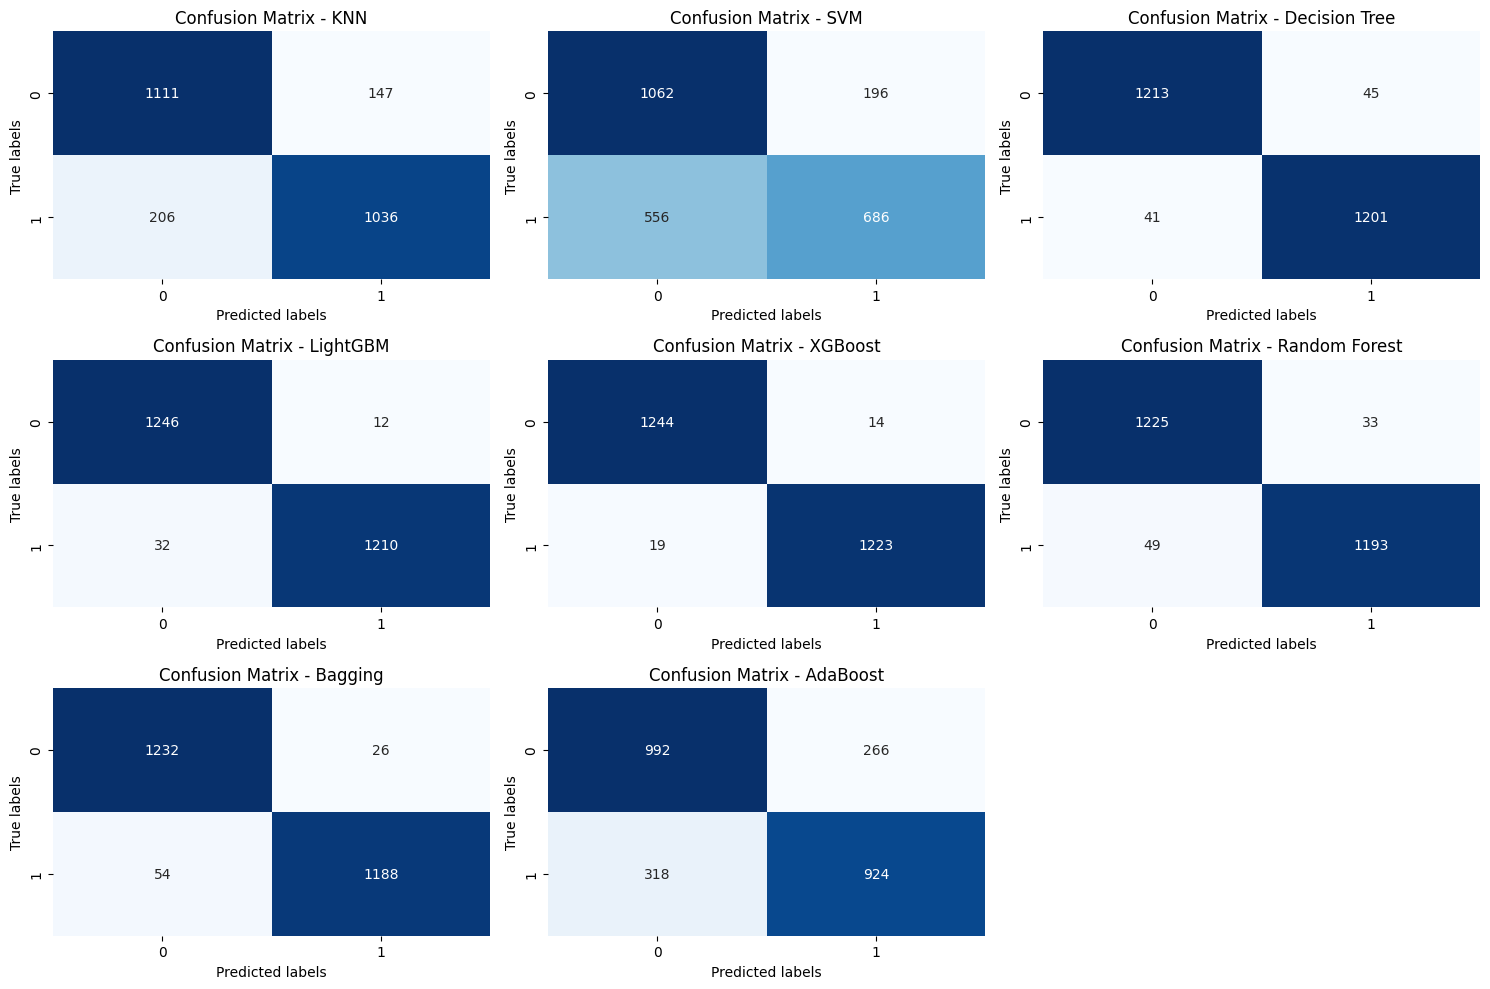

In [39]:
from math import ceil

# Calculate confusion matrix for each model
plt.figure(figsize=(15, 10))
num_models = len(single_models + ensemble_models)
num_rows = ceil(num_models / 3)  # Number of rows needed
num_cols = min(num_models, 3)  # Maximum of 3 columns
for i, model_name in enumerate(single_models + ensemble_models, 1):
    plt.subplot(num_rows, num_cols, i)
    model = None
    if model_name in single_models:
        if model_name == 'KNN':
            model = KNeighborsClassifier(n_neighbors=5)
        elif model_name == 'SVM':
            model = svm.SVC()
        elif model_name == 'Decision Tree':
            model = DecisionTreeClassifier()
        elif model_name == 'LightGBM':
            model = lgb.LGBMClassifier(objective='binary')
        elif model_name == 'XGBoost':
            model = xgb.XGBClassifier(objective='binary:logistic')
        elif model_name == 'Random Forest':
            model = RandomForestClassifier(n_estimators=100, random_state=123)
    elif model_name in ensemble_models:
        if model_name == 'Bagging':
            model = BaggingClassifier(base_estimator=None, n_estimators=10, random_state=123)
        elif model_name == 'AdaBoost':
            base_estimator = DecisionTreeClassifier(max_depth=1)
            model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=123)

    model.fit(train_data_encoded, train_data['Sepsis_Result'])  # Fit the model
    predictions = model.predict(test_data_encoded)  # Generate predictions
    cm = confusion_matrix(test_data['Sepsis_Result'], predictions)  # Calculate confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
plt.tight_layout()
plt.show()


In [40]:
# Preprocessing
data['Sepsis_Result'] = data['Sepsis_Result'].astype('category')
data['Gender'] = data['Gender'].astype('category')

# Split data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=123)

# Convert categorical variables to one-hot encoding
train_data_encoded = pd.get_dummies(train_data.iloc[:, :-1])
test_data_encoded = pd.get_dummies(test_data.iloc[:, :-1])

# Ensure both datasets have the same categorical columns
train_data_encoded, test_data_encoded = train_data_encoded.align(test_data_encoded, join='outer', axis=1, fill_value=0)


In [42]:
from sklearn.metrics import classification_report

# Print classification report for each model
for model_name in single_models + ensemble_models:
    model = None
    if model_name in single_models:
        if model_name == 'KNN':
            model = KNeighborsClassifier(n_neighbors=5)
        elif model_name == 'SVM':
            model = svm.SVC()
        elif model_name == 'Decision Tree':
            model = DecisionTreeClassifier()
        elif model_name == 'LightGBM':
            model = lgb.LGBMClassifier(objective='binary')
        elif model_name == 'XGBoost':
            model = xgb.XGBClassifier(objective='binary:logistic')
        elif model_name == 'Random Forest':
            model = RandomForestClassifier(n_estimators=100, random_state=123)
    elif model_name in ensemble_models:
        if model_name == 'Bagging':
            model = BaggingClassifier(base_estimator=None, n_estimators=10, random_state=123)
        elif model_name == 'AdaBoost':
            base_estimator = DecisionTreeClassifier(max_depth=1)
            model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=123)

    model.fit(train_data_encoded, train_data['Sepsis_Result'])  # Fit the model
    predictions = model.predict(test_data_encoded)  # Generate predictions
    print(f'Classification Report - {model.__class__.__name__}')
    print(classification_report(test_data['Sepsis_Result'], predictions))


Classification Report - KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1258
           1       0.88      0.83      0.85      1242

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500

Classification Report - SVC
              precision    recall  f1-score   support

           0       0.66      0.84      0.74      1258
           1       0.78      0.55      0.65      1242

    accuracy                           0.70      2500
   macro avg       0.72      0.70      0.69      2500
weighted avg       0.72      0.70      0.69      2500

Classification Report - DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1258
           1       0.96      0.97      0.97      1242

    accuracy                           0.97      2500
   macro

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report - AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1258
           1       0.78      0.74      0.76      1242

    accuracy                           0.77      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.77      0.77      0.77      2500



In [45]:
# Define models as dictionaries
single_models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': svm.SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'LightGBM': lgb.LGBMClassifier(objective='binary'),
    'XGBoost': xgb.XGBClassifier(objective='binary:logistic'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=123)
}

ensemble_models = {
    'Bagging': BaggingClassifier(base_estimator=None, n_estimators=10, random_state=123),
    'AdaBoost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=123)
}

# Fit and evaluate each model
for model_name, model in single_models.items():
    model.fit(train_data_encoded, train_data['Sepsis_Result'])
    predictions = model.predict(test_data_encoded)
    print(f'Classification Report - {model_name}')
    print(classification_report(test_data['Sepsis_Result'], predictions))

for model_name, model in ensemble_models.items():
    model.fit(train_data_encoded, train_data['Sepsis_Result'])
    predictions = model.predict(test_data_encoded)
    print(f'Classification Report - {model_name}')
    print(classification_report(test_data['Sepsis_Result'], predictions))


Classification Report - KNN
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1258
           1       0.88      0.83      0.85      1242

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500

Classification Report - SVM
              precision    recall  f1-score   support

           0       0.66      0.84      0.74      1258
           1       0.78      0.55      0.65      1242

    accuracy                           0.70      2500
   macro avg       0.72      0.70      0.69      2500
weighted avg       0.72      0.70      0.69      2500

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1258
           1       0.97      0.97      0.97      1242

    accuracy                           0.97      2500
   macro avg       0.97      0.97 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report - AdaBoost
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1258
           1       0.78      0.74      0.76      1242

    accuracy                           0.77      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.77      0.77      0.77      2500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


[LightGBM] [Info] Number of positive: 3758, number of negative: 3742
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1465
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501067 -> initscore=0.004267
[LightGBM] [Info] Start training from score 0.004267


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_r

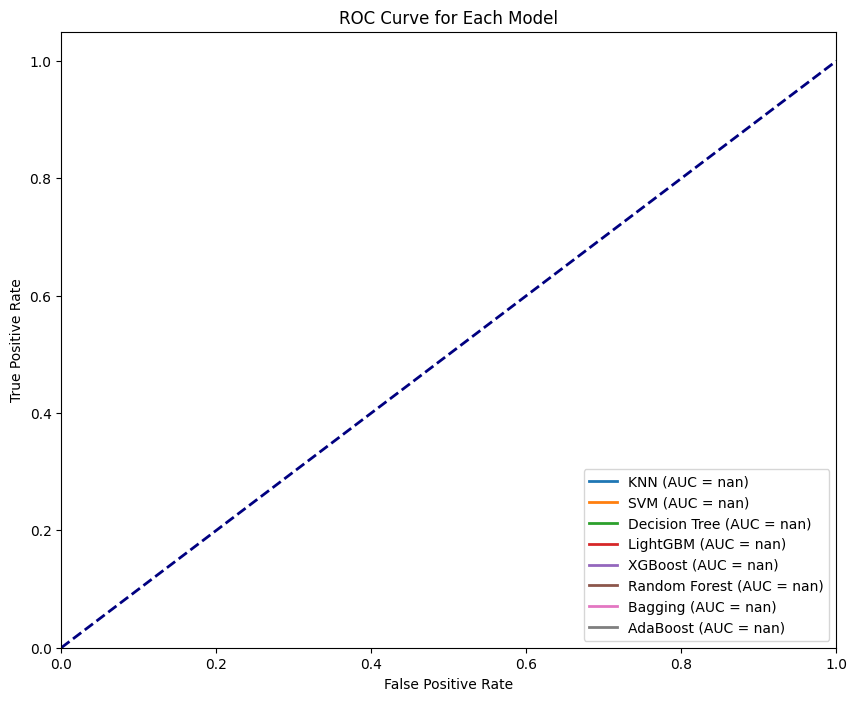

In [46]:
from sklearn.metrics import roc_curve, auc

# Convert categorical variables to appropriate data type
train_data_encoded = train_data.copy()
test_data_encoded = test_data.copy()
for col in train_data_encoded.select_dtypes(include=['category']).columns:
    train_data_encoded[col] = train_data_encoded[col].cat.codes
    test_data_encoded[col] = test_data_encoded[col].cat.codes

# Initialize models with probability=True where applicable
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = svm.SVC(probability=True)
dt_model = DecisionTreeClassifier()
lgb_model = lgb.LGBMClassifier()
xgb_model = xgb.XGBClassifier()
rf_model = RandomForestClassifier(n_estimators=100)
bagging_model = BaggingClassifier(base_estimator=None, n_estimators=10, random_state=123)
boosting_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=123)

# Train each model on the training data
models = [knn_model, svm_model, dt_model, lgb_model, xgb_model, rf_model, bagging_model, boosting_model]
model_names = ['KNN', 'SVM', 'Decision Tree', 'LightGBM', 'XGBoost', 'Random Forest', 'Bagging', 'AdaBoost']

plt.figure(figsize=(10, 8))

for model, name in zip(models, model_names):
    if name == 'LightGBM':
        # Train LightGBM model with categorical feature support
        lgb_model = lgb.LGBMClassifier()
        lgb_model.fit(train_data_encoded.iloc[:, :-1], train_data_encoded['Sepsis_Result'],
                      categorical_feature='auto')

        # Make predictions and calculate the probabilities of the positive class
        probas = lgb_model.predict_proba(test_data_encoded.iloc[:, :-1])[:, 1]
    else:
        # Fit the model on the training data
        model.fit(train_data_encoded.iloc[:, :-1], train_data_encoded['Sepsis_Result'])

        # Make predictions and calculate the probabilities of the positive class
        if hasattr(model, "predict_proba"):
            probas = model.predict_proba(test_data_encoded.iloc[:, :-1])[:, 1]
        else:
            # For models without predict_proba, use decision_function
            probas = model.decision_function(test_data_encoded.iloc[:, :-1])
            probas = (probas - probas.min()) / (probas.max() - probas.min())  # Scale to [0, 1]

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve((test_data_encoded['Sepsis_Result'] == 'Positive').astype(int), probas)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Model')
plt.legend(loc='lower right')
plt.show()


[LightGBM] [Info] Number of positive: 3758, number of negative: 3742
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1467
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501067 -> initscore=0.004267
[LightGBM] [Info] Start training from score 0.004267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

ValueError: num must be an integer with 1 <= num <= 6, not 7

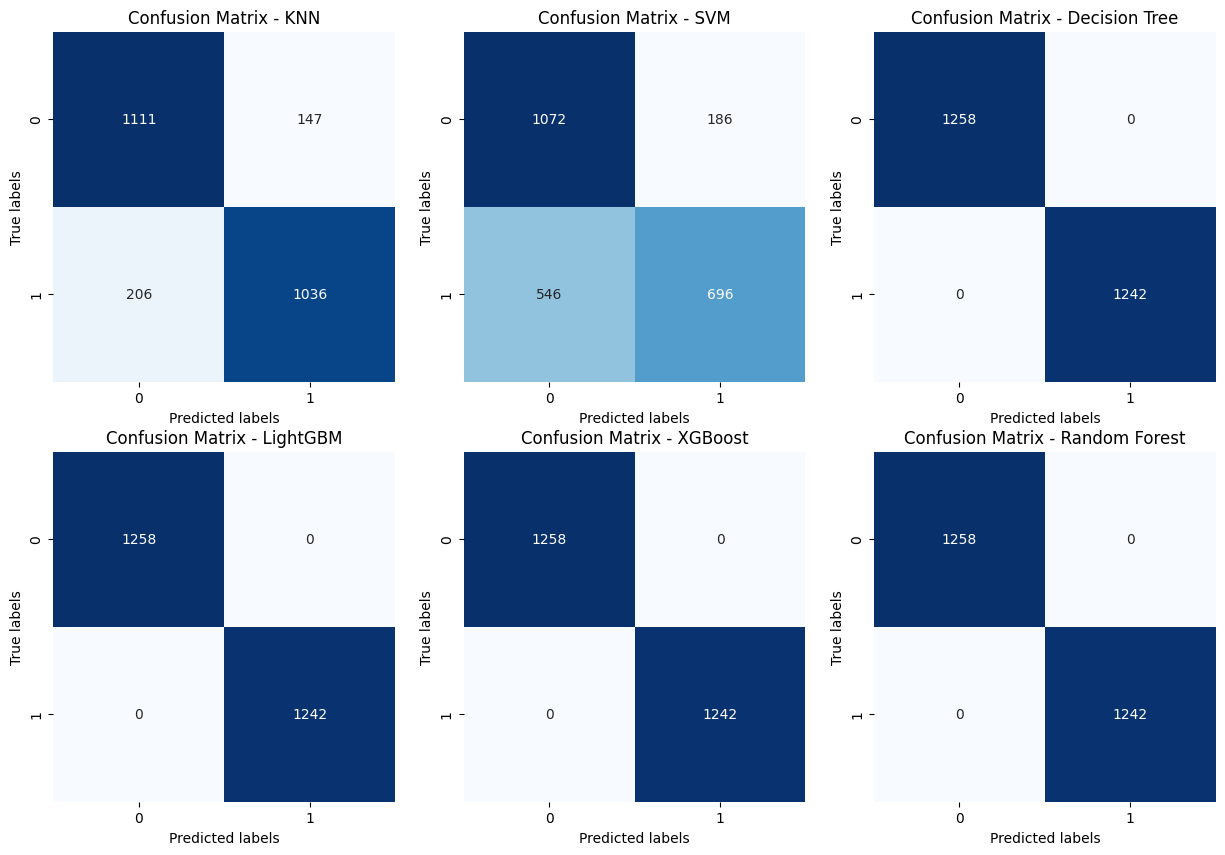

In [31]:
# Confusion Matrix
plt.figure(figsize=(15, 10))
for i, model_name in enumerate(single_models + ensemble_models, 1):
    plt.subplot(2, 3, i)
    model = None
    if model_name in single_models:
        if model_name == 'KNN':
            model = KNeighborsClassifier(n_neighbors=5)
        elif model_name == 'SVM':
            model = svm.SVC()
        elif model_name == 'Decision Tree':
            model = DecisionTreeClassifier()
        elif model_name == 'LightGBM':
            model = lgb.LGBMClassifier(objective='binary')
        elif model_name == 'XGBoost':
            model = xgb.XGBClassifier(objective='binary:logistic')
        elif model_name == 'Random Forest':
            model = RandomForestClassifier(n_estimators=100, random_state=123)
    elif model_name in ensemble_models:
        if model_name == 'Bagging':
            model = BaggingClassifier(base_estimator=None, n_estimators=10, random_state=123)
        elif model_name == 'AdaBoost':
            base_estimator = DecisionTreeClassifier(max_depth=1)
            model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=123)

    model.fit(train_data_encoded, train_data['Sepsis_Result'])
    predictions = model.predict(test_data_encoded)
    cm = confusion_matrix(test_data['Sepsis_Result'], predictions)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
plt.tight_layout()
plt.show()
